In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Imorting Dataset

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset'):
    for filename in filenames:
        os.path.join(dirname, filename)

Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

Mentioning the labels for different dataset

In [ ]:
# Getting labels of training data
labels = os.listdir('/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train')
labels

['rottenoranges',
 'rottenapples',
 'rottenbanana',
 'freshoranges',
 'freshbanana',
 'freshapples']

Providing data directory to DATADIR variable

In [ ]:
DATADIR= '/content/drive/MyDrive/IoT_Project_Ideas/Finalized Idea/Dataset/dataset/train'
IMG_SIZE=100

Sample Image Example

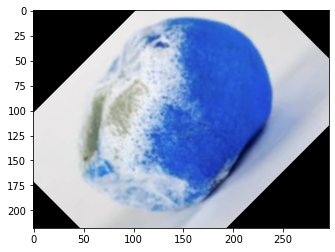

In [ ]:
for category in labels:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

Preprocessing Data

In [ ]:
training_data=[]
def create_training_data():
    for category in labels:
        path=os.path.join(DATADIR, category)
        class_num=labels.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()         

In [ ]:
print(len(training_data))

10901


Storing Training Length 

In [ ]:
lenofimage = len(training_data)

For training an image, converting the image to a array form
As SVM takes 2D input to train, X type (training_data_length , -1)

In [ ]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [ ]:
X.shape

(10901, 30000)

flattening the array

In [ ]:
X = X/255.0

Example of flattened array

In [ ]:
X[1]

array([0., 0., 0., ..., 0., 0., 0.])

y should be in array form compulsory.

In [ ]:
y=np.array(y)

In [ ]:
y.shape

(10901,)

Ready with our dependent and independent features.
Applying train_test_split on our data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
X_train.shape

(8175, 30000)

In [ ]:
X_test.shape

(2726, 30000)

In [ ]:
y_train.shape

(8175,)

In [ ]:
y_test.shape

(2726,)

Fitting data in SVM Model

In [ ]:
# first it was false, making true
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto', probability=True)
svc.fit(X_train, y_train)

Predicting X_test

In [ ]:
y_pred = svc.predict(X_test)

y_pred

array([1, 0, 1, ..., 5, 1, 4])

In [ ]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is :-")
print(classification_report(y_test, y_pred))

Accuracy on unknown data is :-
              precision    recall  f1-score   support

           0       0.57      0.71      0.63       385
           1       0.67      0.70      0.69       562
           2       0.95      0.87      0.91       558
           3       0.84      0.79      0.82       384
           4       0.94      0.94      0.94       402
           5       0.76      0.69      0.72       435

    accuracy                           0.78      2726
   macro avg       0.79      0.78      0.79      2726
weighted avg       0.79      0.78      0.79      2726



In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[273  57  13  24   4  14]
 [ 65 396   9  29   0  63]
 [ 46  18 484   0   8   2]
 [ 37  32   0 304   0  11]
 [ 14   6   1   0 379   2]
 [ 40  78   2   3  14 298]]


In [ ]:
# calculating the overall acuracy using svc.score
acc=svc.score(X_test, y_test)
print(f'accuracy from svc.score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

# calculating the overall acuracy using metrics.accuracy_score
from sklearn import metrics
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy from metrics.accuracy_score = {acc:.4}') # {acc:.4} will include 4 digits after decimal

accuracy from svc.score = 0.7828
accuracy from metrics.accuracy_score = 0.7828


In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test, y_pred))

Accuracy on unknown data is 0.7828319882611886


In [ ]:
# calculating the balanced accuracy using metrics.accuracy_score
acc=metrics.accuracy_score(y_test, y_pred)
print(f'accuracy = {acc:.4}') # {acc:.4} will include 4 digits after decimal

accuracy = 0.7828


Formulating Classification Report

In [ ]:
import pandas as pd

result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})

In [ ]:
result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,5
4,4,4
...,...,...
2721,4,4
2722,2,2
2723,0,5
2724,3,1


In [ ]:
# original & predicted value for all rows present in dataset
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

result

,original,predicted
0,1,1
1,0,0
2,1,1
3,1,5
4,4,4
5,3,3
6,3,0
7,3,5
8,5,5
9,3,3


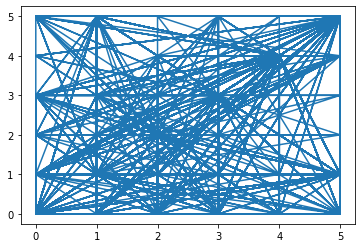

In [ ]:
plt.plot(y_test, y_pred)
plt.show()

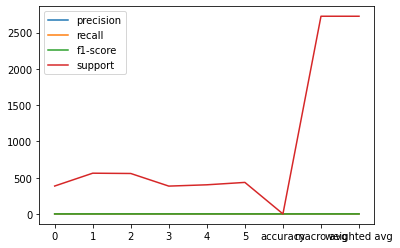

In [ ]:
import pandas as pd

# put it in a dataframe
df = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).transpose()

# plot the dataframe
df.plot()

In [ ]:
from matplotlib import pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LogisticRegression

lr_precision, lr_recall, _ = precision_recall_curve(y_test, y_pred)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

ValueError: ignored

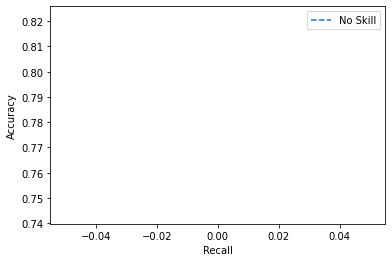

In [ ]:
import pandas as pd
from matplotlib import pyplot

pyplot.plot(acc, linestyle='--', label='No Skill')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Accuracy')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: No contour levels were found within the data range.
  


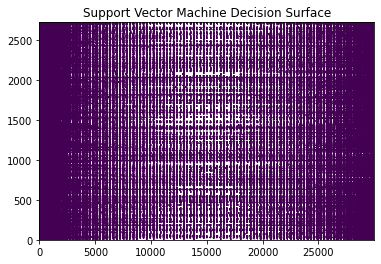

In [ ]:
import pylab as pl
pl.contour(X_test, y_test)
pl.title('Support Vector Machine Decision Surface')
pl.show()

In [ ]:
def predict_at_threshold(prob, threshold):
    return np.where(prob >= threshold, 1., 0.)

def precision_at_threshold(Y, prob, threshold):
    Y_hat = predict_at_threshold(prob, threshold)
    return np.sum((Y_hat == 1) & (Y == 1)) / np.sum(Y_hat)

def recall_at_threshold(Y, prob, threshold):
    Y_hat = predict_at_threshold(prob, threshold)
    return np.sum((Y_hat == 1) & (Y == 1)) / np.sum(Y)

def precision_recall_curve(Y, prob):
    unique_thresh = np.unique(prob)
    precision = [precision_at_threshold(Y, prob, t) for t in unique_thresh]
    recall = [recall_at_threshold(Y, prob, t) for t in unique_thresh]
    return precision, recall, unique_thresh

In [ ]:
y_pred_proba = svc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

AttributeError: ignored

In [ ]:
fig = px.line(x=thresholds, y=acc)
fig.update_xaxes(title="Precision")
fig.update_yaxes(title="Accuracy")

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_pred,  svc.predict_proba(y_test)[:, 1])

AttributeError: ignored